In [ ]:
from Mnist_MoE.train_MoE import moe_train_loop, create_moe_model

moe = create_moe_model(
        nb_experts=4, 
        k_training=3, 
        k_inference=2, 
        tau=0.8,
        lambda_balance=0.05
    )

# Routing policy: 'hard' (tok_K), 'soft' (sotfmax or gumbell_softmax), 'hybrid' (soft with a thresholding)
accuracies = {}
moe_train_info = moe_train_loop(moe, 
                                epochs=8,  
                                selection_policy_t='soft',
                                selection_policy_i='hard', 
                                gumbell_softmax_t=True,
                                gumbell_softmax_i=False, 
                                threshold=None)
accuracies.update(moe_train_info[0])


Starting MoE training...
Number of Experts: 4 | k_training: 2 | k_inference: 2

experts: Expert 1: MNIST_CNN1, Expert 2: MNIST_CNN2, Expert 3: MNIST_CNN2, Expert 4: MNIST_CNN1

Epoch [1/8] - Train Loss: 0.2718, Train Acc: 93.56% | Test Loss: 0.1146, Test Acc: 97.06%
Expert Repartition: ['0.231', '0.247', '0.261', '0.261']
 Lambda Balance: 0.050000

Epoch [2/8] - Train Loss: 0.1476, Train Acc: 97.30% | Test Loss: 0.0805, Test Acc: 98.01%
Expert Repartition: ['0.311', '0.220', '0.177', '0.292']
 Lambda Balance: 0.050000

Epoch [3/8] - Train Loss: 0.1292, Train Acc: 97.85% | Test Loss: 0.1015, Test Acc: 97.62%
Expert Repartition: ['0.454', '0.033', '0.321', '0.192']
 Lambda Balance: 0.050000

Epoch [4/8] - Train Loss: 0.1179, Train Acc: 98.15% | Test Loss: 0.0901, Test Acc: 97.95%
Expert Repartition: ['0.075', '0.301', '0.231', '0.393']
 Lambda Balance: 0.050000

Epoch [5/8] - Train Loss: 0.1102, Train Acc: 98.44% | Test Loss: 0.0600, Test Acc: 98.76%
Expert Repartition: ['0.002', '0.012

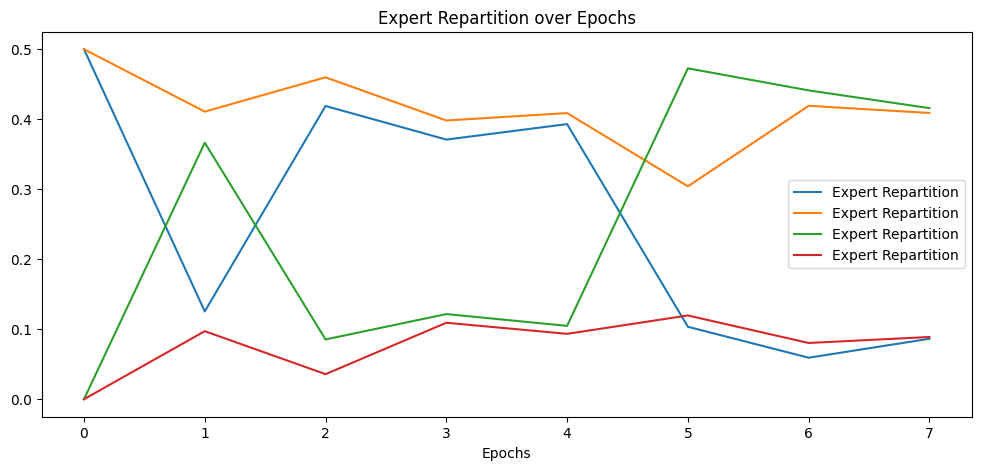

In [2]:
import matplotlib.pyplot as plt
informations = moe_train_info[1]

plt.figure(figsize=(12, 5))
plt.plot([informations[epoch]["repartition"] for epoch in informations], label="Expert Repartition")
plt.xlabel("Epochs")
plt.title("Expert Repartition over Epochs")
plt.legend()
plt.show()

In [ ]:
from Mnist_MoE.train_dense import train_dense_model

accuracies.update(train_dense_model())

In [ ]:
print("\nExpert Accuracies:")
for expert, acc in accuracies.items():
    print(f"{expert}: {acc:.2f}%")